<h1 style="font-size:42px; text-align:center; margin-bottom:30px;"><span style="color:SteelBlue">Step 2
:</span> Data Cleaning</h1>
<hr>

Better data beats better algorithms.
* "blueprint" for efficient data cleaning.
* Different types of data will require different types of cleaning.
* However, the systematic approach laid out here is a good reference point.


<br><hr id="toc">

### Must Do's...

The essential data cleaning steps:
1. [Drop unwanted observations](#drop)
2. [Fix structural errors](#structural)
3. [Remove unwanted outliers](#outliers)
4. [Label missing categorical data](#missing-categorical)
5. [Flag and fill missing numerical data](#missing-numeric)

Rememebr to at the end: save the cleaned dataframe to a new file so we can use it!

### First, let's import libraries and load the dataset.

In [22]:
import pandas as pd
pd.set_option('display.max_columns', 100)

import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

import the dataset

In [23]:
df = pd.read_csv('project_files/real_estate_data.csv')
#Now we're ready to jump into cleaning the data!

<br id="drop">
# 1. Drop unwanted & Irrelevant observations

The first step to data cleaning is removing unwanted observations from your dataset.

Remember, duplicate observations most frequently arise during data collection, such as when you:

1. Combine datasets from multiple places
2. Scrape data
3. Receive data from clients/other departments

In [24]:
# Drop duplicates and look at shape
df = df.drop_duplicates()
df.shape

(1883, 26)

### Irrelevant observations are those that don't actually fit the specific problem that we're trying to solve.

For example, if the dataset contained properties from counties that the our real estate firm doesn't operate in or property types they don't invest in (i.e. commercial properties), we'd want to remove them. (another reason to do systematic Project Scoping)

The dataset has already been filtered to only relevant samples, so we don't need to remove any irrelevant samples.

# 2. Fix structural errors

Next up under data cleaning involves fixing structural errors, such as missing values (NaN's)

* Note: We know basement feature has NaN's. 

In [25]:
# Display unique values of 'basement'
df['basement'].unique()

array([ nan,   1.])

In this case, NaN represents "missing" values, those are actually meant to indicate properties without basements.

Fill missing <code style="color:steelblue">'basement'</code> values with the value <code style="color:crimson">0</code> to turn <code style="color:steelblue">'basement'</code> into a true indicator variable.

In [26]:
# Missing basement values should be 0
df['basement'] = df.basement.fillna(0)

Confirm that we have a true indicator variable:

In [27]:
# Display unique values of 'basement'
df['basement'].unique()

array([ 0.,  1.])

### Next, to check for typos or inconsistent capitalization in our categorical variables

* display all the class distributions for the <code style="color:steelblue">'roof'</code> feature.

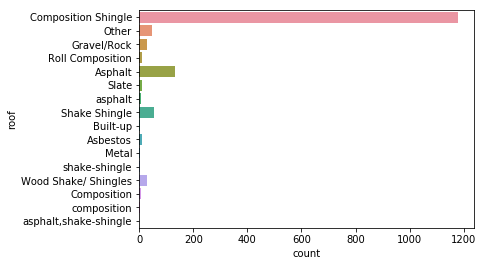

In [28]:
# Class distributions for 'roof'
sns.countplot(y='roof', data = df)

We see we have to make these changes:
* <code style="color:crimson">'composition'</code> should be <code style="color:crimson">'Composition'</code>
* <code style="color:crimson">'asphalt'</code> should be <code style="color:crimson">'Asphalt'</code>
* <code style="color:crimson">'shake-shingle'</code> should be <code style="color:crimson">'Shake Shingle'</code>
* As well as <code style="color:crimson">'asphalt,shake-shingle'</code> to <code style="color:crimson">'Shake Shingle'</code>

In [29]:
# 'composition' should be 'Composition'
df.roof.replace('composition', 'Composition', inplace=True)

# 'asphalt' should be 'Asphalt'
df.roof.replace('asphalt', 'Asphalt', inplace=True)

# 'shake-shingle' and 'asphalt,shake-shingle' should be 'Shake Shingle'
df.roof.replace(['shake-shingle', 'asphalt,shake-shingle'], 'Shake-Shingle', inplace=True)

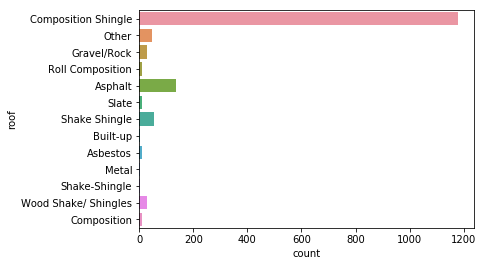

In [30]:
#now let's check out roof
sns.countplot(y='roof', data=df)

Finally, check for mislabeled classes. Plot the class distributions for <code style="color:steelblue">'exterior_walls'</code>.

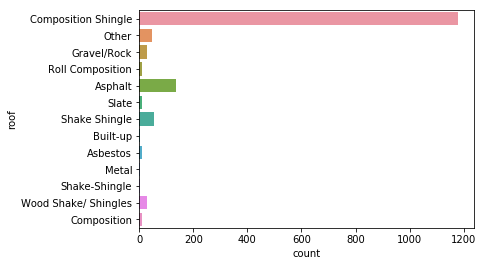

In [31]:
# Class distributions for 'exterior_walls'
sns.countplot(y='roof', data=df)

We can see we need to fix these:
* <code style="color:crimson">'Rock, Stone'</code> should be <code style="color:crimson">'Masonry'</code>
* <code style="color:crimson">'Concrete'</code> and <code style="color:crimson">'Block'</code> should both just be <code style="color:crimson">'Concrete Block'</code>

**First, replace any instances of <code style="color:steelblue">'Rock, Stone'</code> with <code style="color:steelblue">'Masonry'</code> instead.**
* Remember to do it inplace i.e. permanently

In [32]:
# 'Rock, Stone' to'Masonry'
df.exterior_walls.replace('Rock, Stone', 'Masonry', inplace=True)

**Next replace any instances of <code style="color:steelblue">'Concrete'</code> or <code style="color:steelblue">'Block'</code> with <code style="color:steelblue">'Concrete Block'</code> instead.**


In [33]:
# 'Concrete' and 'Block' should be 'Concrete Block'
df.exterior_walls.replace(['Concrete', 'Block'], 'Concrete Block', inplace=True)

**Finally, plot the bar plot of modified coategorical variables to see its new distribution.**

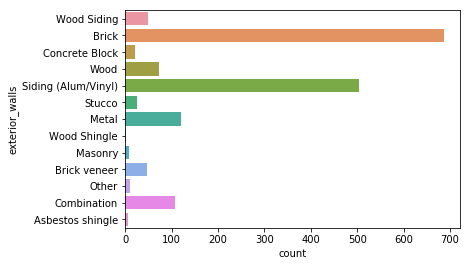

In [34]:
# Class distributions for 'exterior_walls'
sns.countplot(y='exterior_walls', data=df)

# 3. Remove unwanted outliers

Outliers can cause problems with certain types of models, but can also be very informative for your model.
However, we still need a string justification for removal... "innocent until proven guilty".
### can't stress this enough: we must have a good reason for removing an outlier.

Examples of "good reasons":

1. Suspicious measurements that are unlikely to be real data.
e.g. A house transaction in 1750 (when all others are after 1990).
e.g. A house with transaction price of $0.

2. Outliers that belong in a different population.
e.g. A historic site that sold for $3.5 million - 

when all others are standard homes that sold for under $800,000
e.g. A celebrity home with a lot size over 1,000,000 sqft - when all others have lots under 500,000 sqft

3. Outliers that belong to a different problem.
What types of properties will you be applying your model to in the future?
If most of the houses you're trying to predict are homes with lots under 500,000 sqft, then including the one with 1,000,000 sqft will probably hurt your model more than helping it.

To check for potential outliers, we'll start with some simple plots.

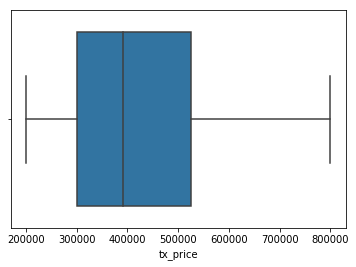

In [36]:
# Start with a box plot of your target variable, since that's the variable that we're trying to predict.
# Box plot of  our target variable'tx_price' using seabon
sns.boxplot(df['tx_price'])

To show more information, make violin plot of transaction price. 

Why choose between box plots and violin plots?

* A box plot only shows summary statistics such as median and interquartile range.
* A violin plot shows the entire probability distribution of the data.

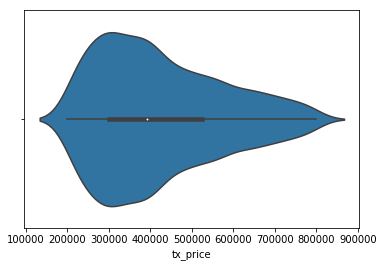

In [39]:
# Violin plot of 'tx_price' using the Seaborn library
sns.violinplot(df.tx_price)

**Plot the violin plots for <code style="color:steelblue">'beds'</code>, <code style="color:steelblue">'sqft'</code>, and <code style="color:steelblue">'lot_size'</code>.**
* Remember: If you want to plot multiple charts in the same code cell, separate them with <code style="color:steelblue">plt.show()</code>, or else they will overlap.

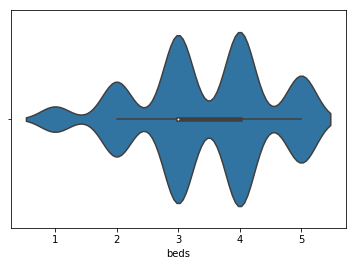

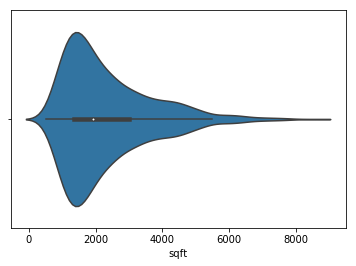

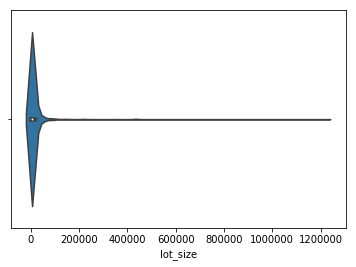

In [42]:
# Violin plot of beds
sns.violinplot(df.beds)
plt.show()

# Violin plot of sqft
sns.violinplot(df.sqft)
plt.show()

# Violin plot of lot_size
sns.violinplot(df.lot_size)
plt.show()


Among those three features, it looks like <code style="color:steelblue">lot_size and sqft</code> have a potential outlier! 
* Look at the largest 5 lot sizes and sqft to confirm.

<br>
**Sort <code style="color:steelblue">df.lot_size</code> and display the top 5 samples.**
* You can sort a Series with the <code style="color:steelblue">.sort_values()</code> function.
* **Tip:** <code style="color:steelblue">.sort_values()</code> has an argument called <code style="color:steelblue">ascending=</code>. By default, it's <code style="color:steelblue">True</code>
* **Tip:** You can chain functions together. This exercise can be completed in 1 line of code.

In [47]:
# Sort df.lot_size and display the top 5 samples
df.lot_size.sort_values(ascending=False).head()

102     1220551
1111     436471
1876     436035
1832     436035
1115     435600
Name: lot_size, dtype: int64

In [48]:
# Sort df.sqft and display the top 5 samples
df.sqft.sort_values(ascending=False).head(10)

1877    8450
1876    7842
1563    7677
1875    7594
1874    7578
1882    7515
1881    7500
1734    7216
1873    7165
1880    7064
Name: sqft, dtype: int64

Seems like sqft does not have any sinificant outliers.
But our largest property has a lot_size of 1,220,551 sqft. The next largest has a lot_size of only 436,471 sqft. 

Because it's unlikely our real estate firm will ever invest in properties with lots that large, and because it's the only one in the dataset, let's remove it so it doesn't interfere with our rojects purpose: to model properties our real estate firm can/will want to invest in.

<br>
**Good reason to remove observations with <code style="color:steelblue">lot_size</code> greater than 500,000 sqft.**
* Use a boolean mask to do so (filter to keep only wanted observations)
* Then, overwrite the existing <code style="color:steelblue">df</code> object

In [56]:
# Remove lot_size outliers
lot_size_mask = df[df.lot_size <500000]
df = lot_size_mask

# print new length of df (that is how many observations we now have)
len(df)

1882

# 4. Label missing categorical data
### you cannot simply ignore missing values in your dataset. You must handle them in some way for the very practical reason that Scikit-Learn algorithms do not accept missing values.

So time to address missing data

Firstly, the 2 most commonly recommended ways of dealing with missing data actually suck.

They are:
- 1) Dropping observations that have missing values
        -  When you drop observations, you drop information.
    - The fact that the value was missing may be informative in itself.
    - In real situations, you often need to make predictions on new data even if some of the features are missing!


- 2) Imputing the missing values based on values from other observations
        - The value was originally missing but you filled it in, which always leads to a loss in information, no matter how sophisticated your imputation method is.
   - Again, "missingness" is almost always informative in itself, and you should tell your algorithm if a value was missing.
   - Even if you build a model to impute your values, you're not adding any real information. You're just reinforcing the patterns already provided by other features.
   
   
   In short...

You always want to tell your algorithm that a value was missing because missingness is informative. The two most commonly suggested ways of handling missing data (dropping & imputing) don't do that.

So here's what we can do instead for categorical features:

In [60]:
# Display total number of missing values of our categorical features
df.select_dtypes(include=['object']).isnull().sum()

property_type       0
exterior_walls    223
roof              353
dtype: int64

looks like both 'exterior_walls' and 'roof' have missing values.
---> let's just label those as missing.

We label our NaN values for categorical variables as 'Missing' for three reasons:
1. You're essentially adding a new class for the feature.
2. This tells the algorithm that the value was missing.
3. This also gets around the Scikit-Learn technical requirement for no missing values.

*** Write a loop that fills all the missing values for categorical features with the value

In [61]:
# Fill missing categorical values
for column in df.select_dtypes(include=['object']):
    df[column] = df[column].fillna('Missing')

**Now, display the number of missing values for each categorical feature.**

In [65]:
# Display number of missing values by feature (categorical)
df.select_dtypes(include=['object']).isnull().sum()

property_type     0
exterior_walls    0
roof              0
dtype: int64

# 5. Flag and Filling missing numeric data

how should we handle missing values in numeric features?

Why not just impute it with the mean, as commonly recommended?

If  we did that, we'd be obscuring the fact that the value was originally missing.
Again, missingness is often informative!!

Instead, we should flag the observation with an indicator feature of missingness.

For example, you could name the new indicator feature 'sqft_missing' to flag observations with missing values of the original 'sqft' feature.
* 0 if not missing.
* 1 if missing.

Then, you would simply fill in the original missing value with 0 just to meet Scikit-Learn's technical requirement of no missing values.

By using this technique of flagging and filling, you are essentially allowing the algorithm to estimate the optimal constant for missingness, instead of just filling it in with the mean.

When used properly, this technique almost always performs better than imputation methods in practice.

Lets do it:
First, let's find and count missing values in numerical feature.

In [68]:
# Display number of missing values of numerical features (all other than categorical features)
df.select_dtypes(exclude=['object']).isnull().sum()

tx_price              0
beds                  0
baths                 0
sqft                  0
year_built            0
lot_size              0
basement              0
restaurants           0
groceries             0
nightlife             0
cafes                 0
shopping              0
arts_entertainment    0
beauty_spas           0
active_life           0
median_age            0
married               0
college_grad          0
property_tax          0
insurance             0
median_school         0
num_schools           0
tx_year               0
dtype: int64

Well, looks like we don't have any numerical features with missing values in this dataset.

Still always remember flagging and filling missing numerical values!

### Finally, let's save the cleaned dataframe we worked hard to clean.
* Use Pandas's <code style="color:steelblue">.to_csv()</code> function.
* We set <code style="color:steelblue">index=<span style="color:crimson">None</span></code> so Pandas drops the indices and only stores the actual data in the CSV.

In [69]:
# Save cleaned dataframe to new file
df.to_csv('cleaned_df.csv', index=None)

Now we can use <code style="color:steelblue">'cleaned_df.csv'</code> as our cleaned code!

## Next Steps

As a reminder, here are the essential things to do in a Data Cleaning:

* Confirm that the dataset doesn't have any duplicate and irrelevant observations.
* Fix various structural errors, such as mislabeled classes.
* Sif through plotting violin plots, remove any outliers(with good reason).
* Label missing data in your categorical features as 'Missing.

All of this data cleaning is essential for your algorithms to run smoothly. 
When we do feature engineering, we use our cleaned dataset to create new features that will improve model performance.
